Text(0.5, 1.0, 'Root Mean Squared Error')

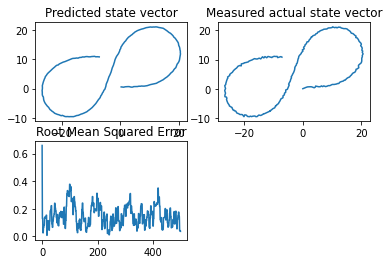

In [ ]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import sys
import matplotlib.pyplot as plt
measurements = pd.read_csv('/content/obj_pose-laser-radar-synthetic-input.txt', header=None, delim_whitespace = True, skiprows=1)
#print(measurements)
prv_time = 1477010443000000/1000000.0
x = np.array([
        [0.312242],
        [0.5803398],
        [0],
        [0]
        ])
a=[]
b=[]
c=[]
d=[]
r=[]
ground_truth = np.zeros([4, 1])
rmse = np.zeros([4, 1])
P = np.array([
        [1, 0, 0, 0],
        [0, 1, 0, 0],
        [0, 0, 1000, 0],
        [0, 0, 0, 1000]
        ])
A = np.array([
        [1.0, 0, 1.0, 0],
        [0, 1.0, 0, 1.0],
        [0, 0, 1.0, 0],
        [0, 0, 0, 1.0]
        ])
H = np.array([
        [1.0, 0, 0, 0],
        [0, 1.0, 0, 0]
        ])
I = np.identity(4)
z_lidar = np.zeros([2, 1])
R = np.array([
        [0.0225, 0],
        [0, 0.0225]
        ])
noise_ax = 5
noise_ay = 5
Q = np.zeros([4, 4])
def predict():
    global x, P, Q
    x = np.matmul(A, x)
    At = np.transpose(A)
    P = np.add(np.matmul(A, np.matmul(P, At)), Q)
def update(z):
    global x, P
    Y = np.subtract(z_lidar, np.matmul(H, x))
    Ht = np.transpose(H)
    S = np.add(np.matmul(H, np.matmul(P, Ht)), R)
    K = np.matmul(P, Ht)
    Si = inv(S)
    K = np.matmul(K, Si)
    x = np.add(x, np.matmul(K, Y))
    P = np.matmul(np.subtract(I ,np.matmul(K, H)), P)
def CalculateRMSE(estimations, ground_truth):
    rmse = np.zeros([4, 1])
    if (sys.getsizeof(estimations) != sys.getsizeof(ground_truth) or sys.getsizeof(estimations) == 0):
        print ('Invalid estimation or ground_truth data')
        return rmse
    rmse[0][0] =  np.sqrt(((estimations[0][0] - ground_truth[0][0]) ** 2).mean())
    rmse[1][0] =  np.sqrt(((estimations[1][0] - ground_truth[1][0]) ** 2).mean())
    rmse[2][0] =  np.sqrt(((estimations[2][0] - ground_truth[2][0]) ** 2).mean())
    rmse[3][0] =  np.sqrt(((estimations[3][0] - ground_truth[3][0]) ** 2).mean())
    #print(rmse)
    return rmse
for i in range (len(measurements)):
    new_measurement = measurements.iloc[i, :].values
    if new_measurement[0] == 'L':
        cur_time = new_measurement[3]/1000000.0
        dt = cur_time - prv_time
        prv_time = cur_time
        dt_2 = dt * dt
        dt_3 = dt_2 * dt
        dt_4 = dt_3 * dt
        A[0][2] = dt
        A[1][3] = dt
        Q[0][0] = dt_4/4*noise_ax
        Q[0][2] = dt_3/2*noise_ax
        Q[1][1] = dt_4/4*noise_ay
        Q[1][3] = dt_3/2*noise_ay
        Q[2][0] = dt_3/2*noise_ax
        Q[2][2] = dt_2*noise_ax
        Q[3][1] = dt_3/2*noise_ay
        Q[3][3] = dt_2*noise_ay
        z_lidar[0][0] = new_measurement[1]
        z_lidar[1][0] = new_measurement[2]
        ground_truth[0] = new_measurement[4]
        ground_truth[1] = new_measurement[5]
        ground_truth[2] = new_measurement[6]
        ground_truth[3] = new_measurement[7]
        predict()
        update(z_lidar)
        
    a.append(x[0])
    b.append(x[1])
    c.append(z_lidar[0][0])
    d.append(z_lidar[1][0])
    rmse = CalculateRMSE(x, ground_truth)
    r.append(np.sqrt((rmse[0]*rmse[0])+(rmse[1]*rmse[1])))
    #print(x[0],x[1])
plt.subplot(2,2,1)
plt.plot(a,b)
plt.title("Predicted state vector")
plt.subplot(2,2,2)
plt.plot(c,d)
plt.title("Measured actual state vector")
s=np.arange(0,len(measurements))
plt.subplot(2,2,3)
plt.plot(s,r)
plt.title("Root Mean Squared Error")





    
